# Student Info

**Faris Abu Farha**

**ID: 1200546**

Case Study #1: Data Cleaning and Feature Engineering for the Bike
Sharing Dataset

In this case study, you will perform essential data preprocessing steps on the modified
version of the Bike Sharing Dataset. The bike-sharing rental dataset includes a two-
year historical log (2011-2012) from Capital Bikeshare in Washington D.C., aggregated
on an hourly basis, with additional weather and seasonal information. The dataset
comprises several fields such as the date, season, year, month, hour, whether the day is
a holiday or not, day of the week, whether the day is a working day, and count of total
rental bikes, among others. A detailed description of the data and the fields can be found
in the ReadMe file.
Follow these steps:
1. You
may
download
the
dataset
using
the
following
link
https://github.com/mkjubran/ENCS5141Datasets/tree/main/ENCS5141_BikeSh
aringDataset_Modified
2. Perform initial data exploration to understand the dataset’s structure, features,
and any missing values. Summarize the dataset’s statistics and gain insights into
the data.
3. Address any data quality issues, such as missing values and outliers. Decide on
an appropriate strategy for handling missing data, such as imputation or removal
of rows/columns.
4. Analyze the relevance of each feature for your machine learning task by using
feature selection techniques.
5. If the dataset contains categorical variables, encode them into a numerical format
suitable for machine learning models.
6. Split the dataset into training and testing subsets to evaluate the performance of
your machine learning models.
7. Scale or normalize the numerical features to ensure consistent scaling across
variables.
8. Apply suitable dimensionality reduction techniques to reduce the size of the data
while preserving important information.
9. Validate your preprocessing pipeline by training and evaluating a machine
learning model, such as the Random Forest model, on the preprocessed data.
10. Compare the results to the model trained on the raw data (before feature filtering,
transformation, and reduction) to ensure that preprocessing has improved model
performance.

# 1. Data Exploration



After downloading the dataset, we will start by exploring the dataset to understand its structure, features, and any missing values. We will also summarize the dataset's statistics and gain insights into the data.

## 1.1 Data Loading  and Exploration

In [ ]:
import pandas as pd

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

uploaded = files.upload()

DATA_PATH = '/content/hours.csv'

df = pd.read_csv(DATA_PATH)
df.info()

Mounted at /content/drive


Saving hours.csv to hours.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17378 non-null  float64
 5   hr          17379 non-null  int64  
 6   holiday     17367 non-null  float64
 7   weekday     17378 non-null  object 
 8   workingday  17379 non-null  int64  
 9   weathersit  17376 non-null  float64
 10  temp        16930 non-null  float64
 11  atemp       17324 non-null  float64
 12  hum         17086 non-null  float64
 13  windspeed   17071 non-null  float64
 14  casual      17344 non-null  float64
 15  registered  17363 non-null  float64
 16  cnt         17367 non-null  float64
dtypes: float64(10), int64(4), object(3)
memory usage: 2.3+ MB


The dataset is a bike-sharing dataset, each row is a record of bike rentals, and each column represents a feature of the dataset. The dataset contains 17 columns and 17379 rows. The dataset contains both numerical and categorical columns.

The dataset contains 17 columns and 17379 rows as shown in the output above.

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,Spring,0,1.0,0,0.0,Saturday,0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,1/1/11,Spring,0,1.0,1,0.0,Saturday,0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,1/1/11,Spring,0,1.0,2,0.0,Saturday,0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,1/1/11,Spring,0,1.0,3,0.0,Saturday,0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,1/1/11,Spring,0,1.0,4,0.0,Saturday,0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


The above output shows the first 5 rows of the dataset. We can see the different columns.

In [ ]:
df.drop(columns=['instant'], inplace=True)
# we don't need the 'instant' column as it is just an index column

In [ ]:
# statistical info about the dataset
df.describe()

,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17378.000000,17379.000000,17367.000000,17379.000000,17376.000000,16930.000000,17324.000000,17086.000000,17071.000000,17344.000000,17363.000000,17367.000000
mean,0.502561,6.538094,11.546752,0.028790,0.682721,1.425184,0.496731,0.480431,0.626541,0.192688,35.642412,153.883603,189.520182
std,0.500008,3.438618,6.914405,0.167221,0.465431,0.639367,0.211812,0.289931,0.192888,0.242883,49.261964,151.387243,181.402041
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,34.000000,40.000000
50%,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,7.000000,14.000000,1.000000,17.000000,367.000000,886.000000,977.000000


In [ ]:
# check for duplicated rows
df.duplicated().sum()


0

In [ ]:
# check for the unique values in each column
df.nunique()

,0
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
temp,57


Insights:
- The dataset contains 17 columns and 17379 rows.
- There are missing values in the dataset.
- There are no duplicated rows in the dataset.
- The dataset contains both numerical and categorical columns.
- The dataset contains columns with multiple unique values.
- The dataset contains columns with date and time values.
- The dataset contains columns with categorical values.
- The dataset contains columns with numerical values.
- The dataset contains columns with ordinal values.


## 1.2 Handling Missing Values

In [ ]:
import numpy as np

# checking for missing values

print(df.isnull().sum())

# percentage of missing values
print("====================================")

print('Number of missing values:', df.isnull().sum().sum())

print("====================================")

# percentage of missing values

print(
    f"Percentage of bike records that has one or more missing value:  {100 * df.isnull().sum().sum() / df.shape[0]:.2f} %")  # np.product(.shape) = total number of cells in the dataset

dteday          0
season          0
yr              0
mnth            1
hr              0
holiday        12
weekday         1
workingday      0
weathersit      3
temp          449
atemp          55
hum           293
windspeed     308
casual         35
registered     16
cnt            12
dtype: int64
Number of missing values: 1185
Percentage of bike records that has one or more missing value:  6.82 %



From the output above, we can see that there are missing values in the dataset, these missing values need to be addressed before proceeding with the data preprocessing steps.


In [ ]:
# show the rows with the missing values
df[df.isnull().any(axis=1)]  # axis = 1 to check for missing values in each row

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,1/1/11,Spring,0,1.0,16,0.0,Saturday,0,NaN,0.42,0.4242,0.82,0.2985,41.0,52.0,93.0
17,1/1/11,Spring,0,1.0,17,0.0,Saturday,0,NaN,0.44,0.4394,0.82,0.2836,15.0,52.0,67.0
23,1/1/11,Spring,0,1.0,23,0.0,Saturday,0,NaN,0.46,0.4545,0.88,0.2985,15.0,24.0,39.0
25,1/2/11,Spring,0,1.0,1,0.0,Sunday,0,2.0,NaN,0.4394,0.94,0.2537,1.0,16.0,17.0
26,1/2/11,Spring,0,1.0,2,0.0,Sunday,0,2.0,NaN,0.4242,1.00,0.2836,1.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15632,10/18/12,Winter,1,10.0,13,0.0,Thursday,1,1.0,0.62,0.6212,0.53,NaN,96.0,236.0,332.0
15633,10/18/12,Winter,1,10.0,14,0.0,Thursday,1,2.0,0.62,0.6212,0.50,NaN,94.0,191.0,285.0
15634,10/18/12,Winter,1,10.0,15,0.0,Thursday,1,2.0,0.60,0.6061,0.60,NaN,69.0,284.0,353.0
15635,10/18/12,Winter,1,10.0,16,0.0,Thursday,1,1.0,0.60,0.6212,0.56,NaN,94.0,356.0,450.0


### 1.2.1 Removal of Rows/Columns with Missing Values


In [ ]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]

Number of empty records = 0


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
print(df.isnull().sum())

dteday          0
season          0
yr              0
mnth            1
hr              0
holiday        12
weekday         1
workingday      0
weathersit      3
temp          449
atemp          55
hum           293
windspeed     308
casual         35
registered     16
cnt            12
dtype: int64


From the output above, we can see that there are missing values in the dataset. We will remove the rows with missing values as they are very few compared to the total number of records in the dataset. the columns with relatively small number of missing values are:

* mnth
* holiday
* weekday
* weathersit
* atemp
* casual
* registered
* cnt


In [ ]:
# drop rows with missing values for the columns with missing values with few missing values
SUBSET_COL_WITH_FEW_VALUES_MISSING = ['mnth', 'holiday', 'weekday', 'weathersit', 'atemp', 'casual', 'registered',
                                      'cnt']
df.dropna(subset=SUBSET_COL_WITH_FEW_VALUES_MISSING, inplace=True)

In [ ]:
print(df.isnull().sum())

dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp          433
atemp           0
hum           291
windspeed     307
casual          0
registered      0
cnt             0
dtype: int64


From the above output, we can see that the rows with missing values for the certain column that hav been assigned, have been removed from the dataframe. Now we will have to deal with the missing values in the column 'hum'  'windspeed', and 'temp'.

### 1.2.2 Imputation of Missing Values


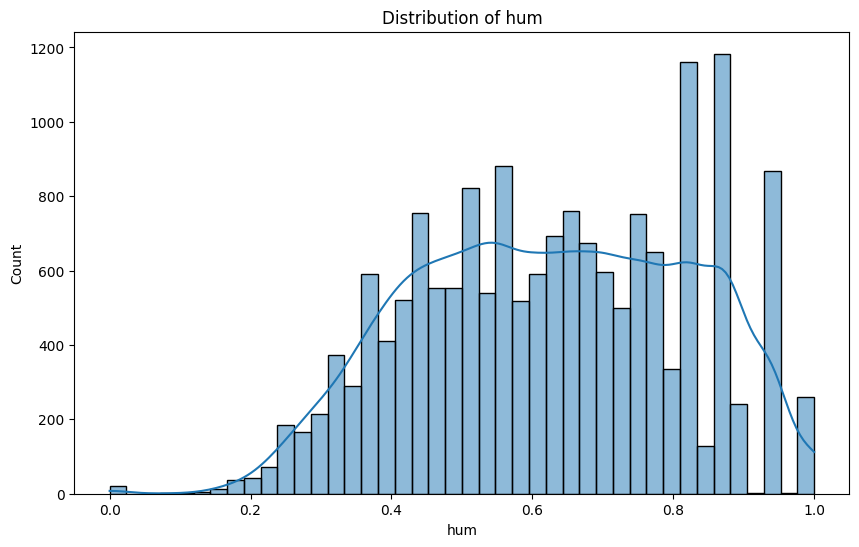

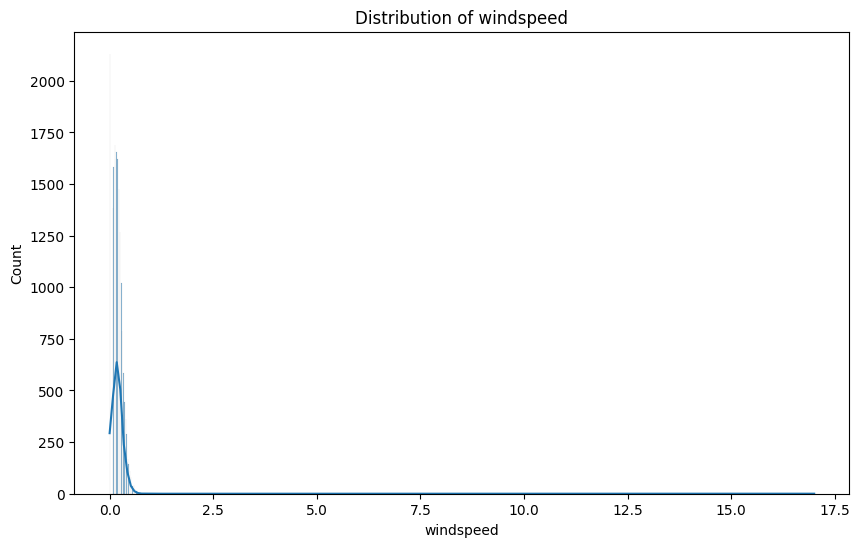

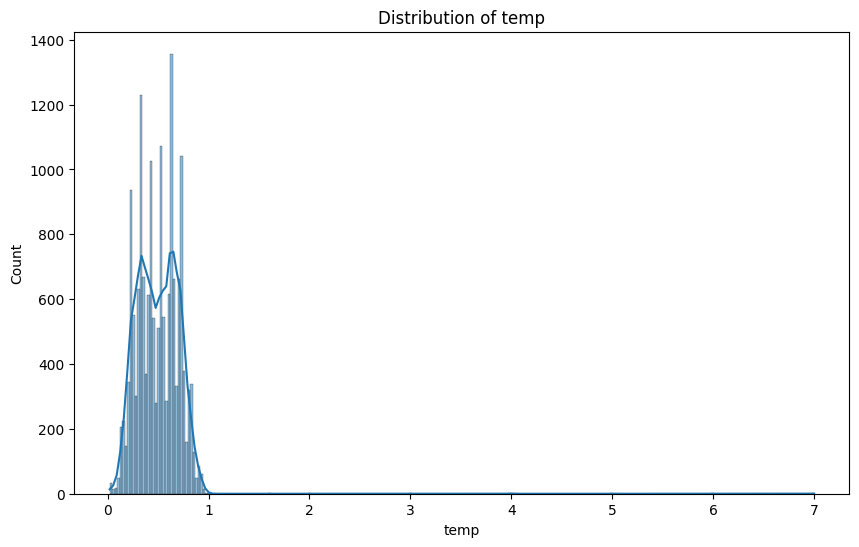

In [ ]:
# impute missing values for the columns with missing values
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

features = ['hum', 'windspeed', 'temp']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



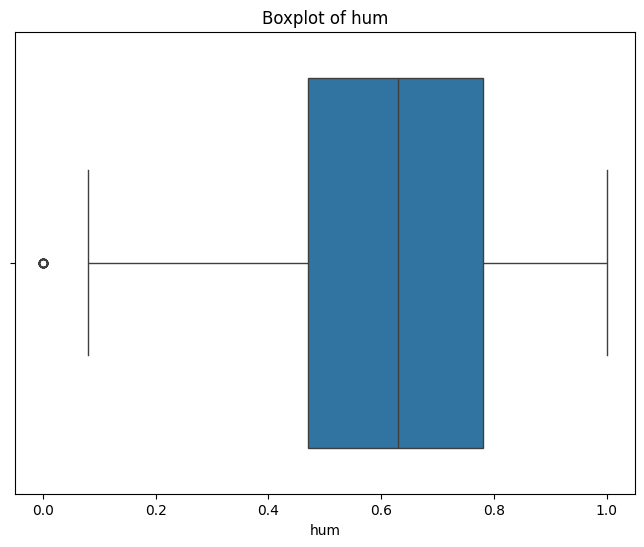

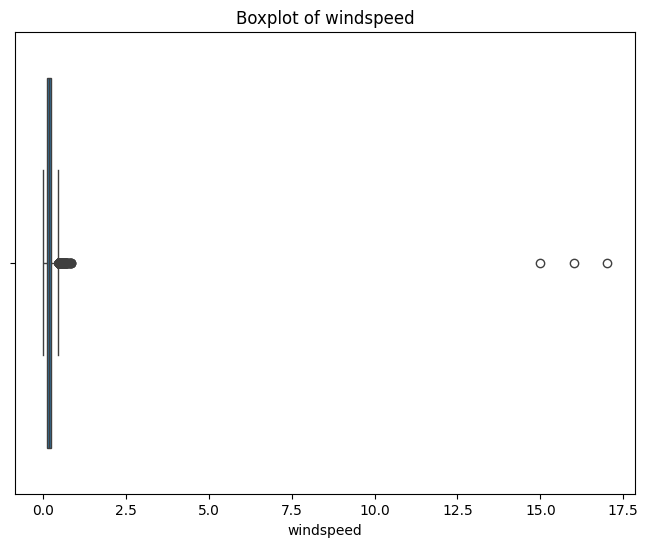

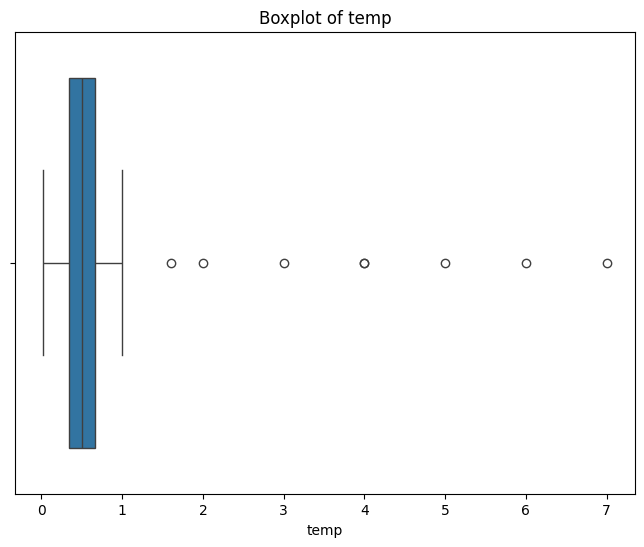

In [ ]:
# remove warnings
import warnings

warnings.filterwarnings('ignore')

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

From the above plots, we can see that the columns 'hum' tend to have a normal distribution without less outliers, while the columns 'windspeed' and 'temp' have outliers. We will impute the missing values in the 'hum' column with the mean value and the missing values in the 'windspeed' and 'temp' columns with the median value.

In [ ]:

imputer = SimpleImputer(strategy='median')

df[['windspeed', 'temp']] = imputer.fit_transform(df[['windspeed', 'temp']])

# impuute the missing values in the 'hum' column with the mean  value

imputer = SimpleImputer(strategy='mean')
df['hum'] = imputer.fit_transform(df[['hum']])


In [ ]:
# check for missing values after imputation
print(df.isnull().sum())

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Data preprocessing steps have been performed to handle the missing values in the dataset. The missing values have been imputed using the median value for the columns 'windspeed' and 'temp' and the mean value for the column 'hum'.

## Outliers Handling

In [ ]:
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


In [ ]:
features_numeric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
features_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for feature in features_numeric:
    lower_bound, upper_bound = detect_outliers_iqr(df, feature)
    print(f'Feature: {feature}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    print(f'Number of outliers: {df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].shape[0]}')
    print('====================================')



Feature: temp, Lower Bound: -0.10999999999999993, Upper Bound: 1.0899999999999999
Number of outliers: 8
Feature: atemp, Lower Bound: -0.09854999999999997, Upper Bound: 1.0530499999999998
Number of outliers: 8
Feature: hum, Lower Bound: 0.029999999999999916, Upper Bound: 1.23
Number of outliers: 22
Feature: windspeed, Lower Bound: -0.1193, Upper Bound: 0.4775
Number of outliers: 335
Feature: casual, Lower Bound: -62.0, Upper Bound: 114.0
Number of outliers: 1187
Feature: registered, Lower Bound: -245.0, Upper Bound: 499.0
Number of outliers: 675
Feature: cnt, Lower Bound: -321.5, Upper Bound: 642.5
Number of outliers: 501


From the output above, we can see that there are outliers in the dataset. We will handle the outliers using the IQR method. Since the outliers aren't few; we will  replace the outliers with  the lower and upper bounds *(CAPPING)*.

In [ ]:
def handle_outliers_iqr(df, feature):
    lower_bound, upper_bound = detect_outliers_iqr(df, feature)
    # replace the outliers with the lower and upper bounds
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
    return df

In [ ]:
for feature in features_numeric:
    df = handle_outliers_iqr(df, feature)

for feature in features_numeric:
    lower_bound, upper_bound = detect_outliers_iqr(df, feature)
    print(f'Feature: {feature}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    print(f'Number of outliers: {df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].shape[0]}')
    print('====================================')
    #33333

Feature: temp, Lower Bound: -0.10999999999999993, Upper Bound: 1.0899999999999999
Number of outliers: 0
Feature: atemp, Lower Bound: -0.09854999999999997, Upper Bound: 1.0530499999999998
Number of outliers: 0
Feature: hum, Lower Bound: 0.029999999999999916, Upper Bound: 1.23
Number of outliers: 0
Feature: windspeed, Lower Bound: -0.1193, Upper Bound: 0.4775
Number of outliers: 0
Feature: casual, Lower Bound: -62.0, Upper Bound: 114.0
Number of outliers: 0
Feature: registered, Lower Bound: -245.0, Upper Bound: 499.0
Number of outliers: 0
Feature: cnt, Lower Bound: -321.5, Upper Bound: 642.5
Number of outliers: 0


## 1.3 Feature Analysis

### 1.3.1 Categorical Features

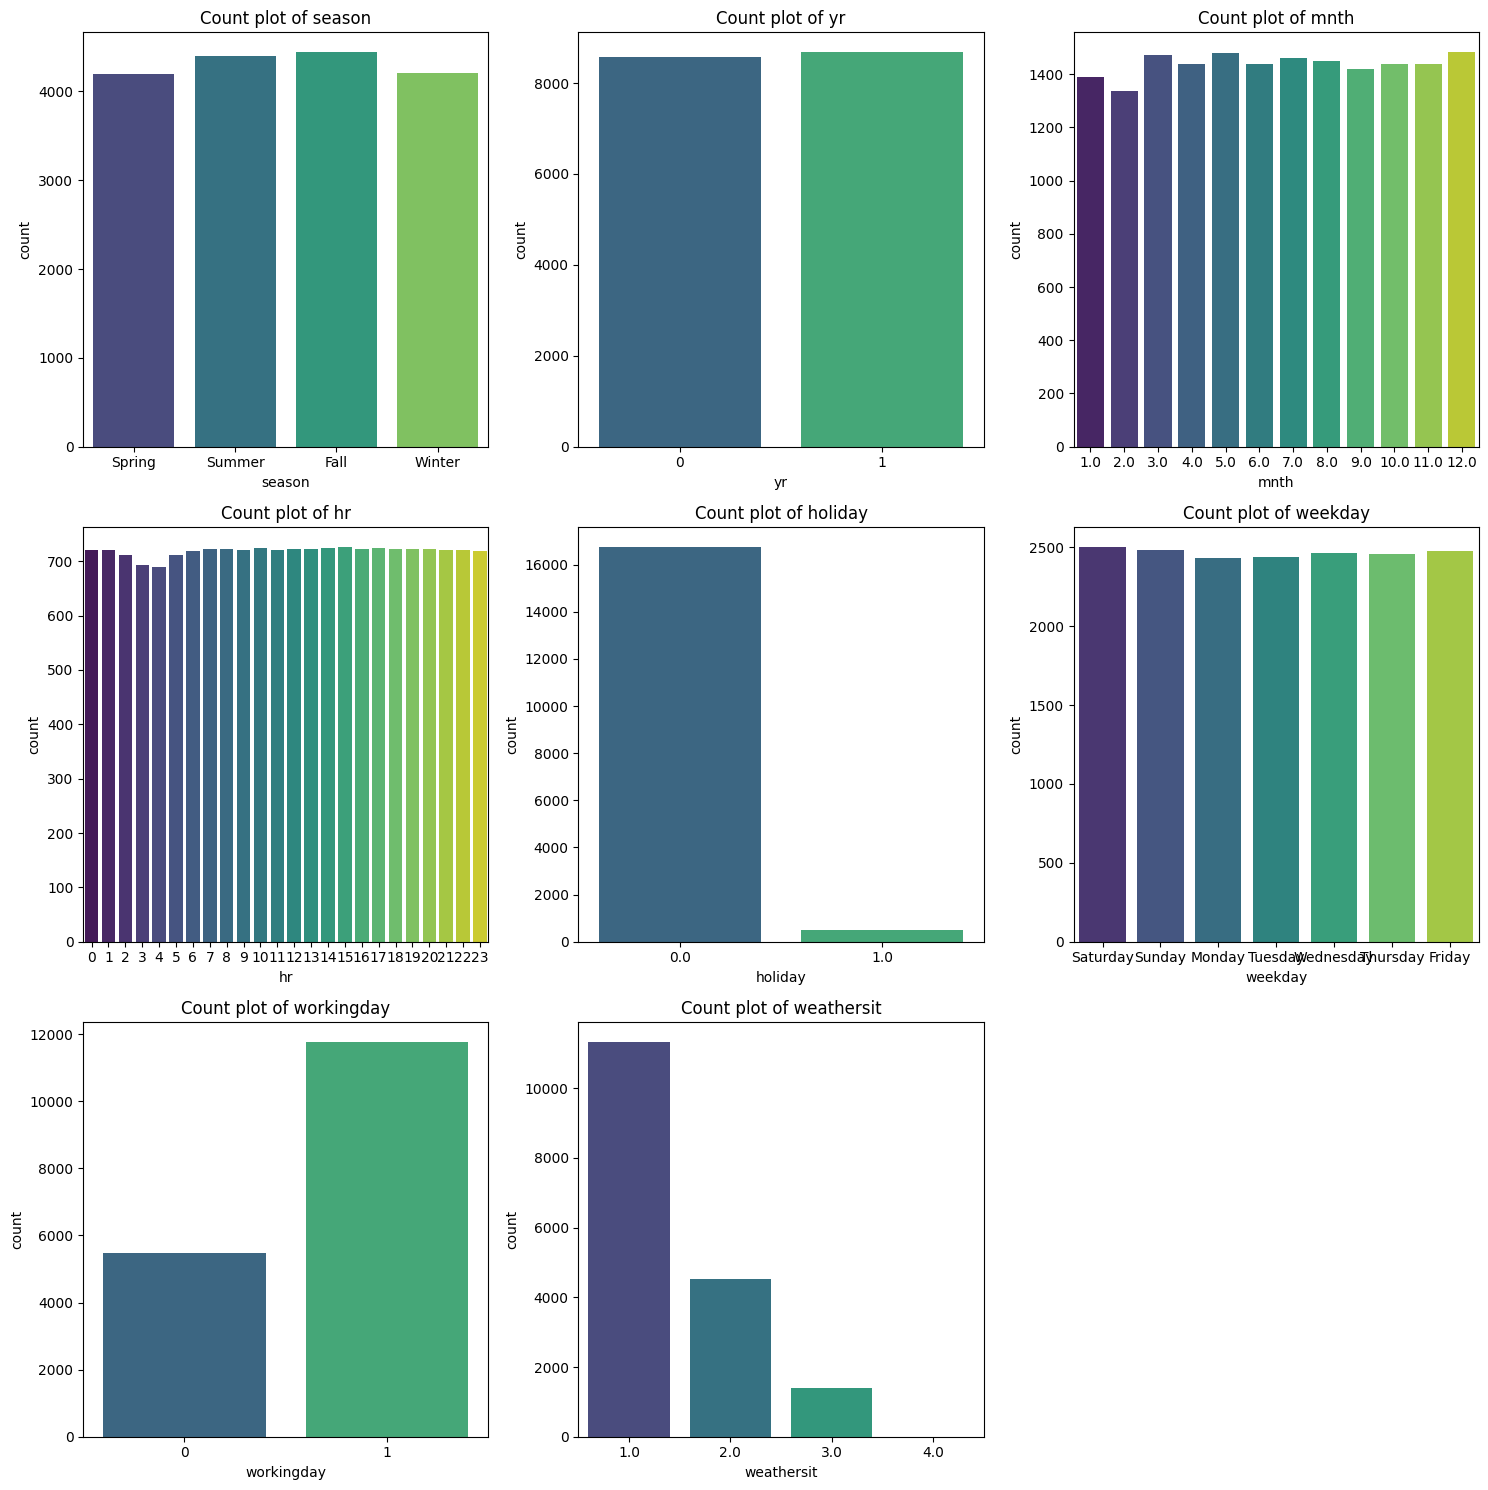

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 15))
counter = 1

for col in df.columns:
    if col in features_categorical:
        plt.subplot(3, 3, counter)
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Count plot of {col}')
        counter += 1

plt.tight_layout()
plt.show()

#### 1. Season

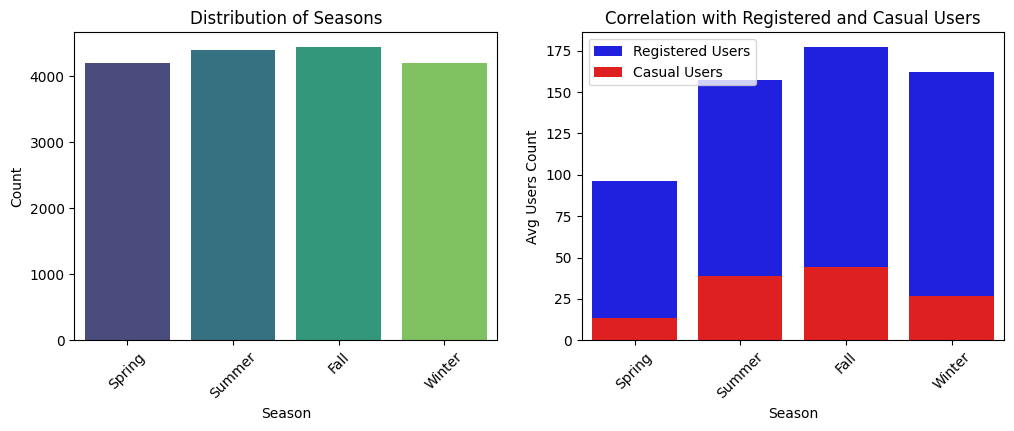

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of bike rentals for each season
sns.countplot(x='season', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Seasons')
ax[0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Count')

# Plot the average number of registered and casual users for each season
sns.barplot(x='season', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], errorbar=None)
sns.barplot(x='season', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
plt.show()

From the above outputs, we can see the count of bike rentals for each season and the average number of registered and casual users for each season. The number of bike rentals is higheris the highest in season Fall compared to the other seasons. The average number of registered users is higher than the average number of casual users in all seasons.

#### 2. Year

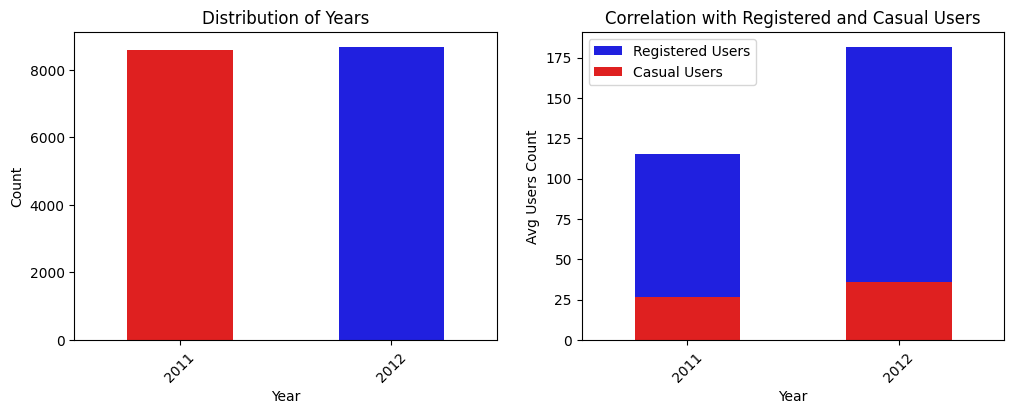

In [ ]:
# plot the count of bike rentals for each year registered and not registered

fig, ax = plt.subplots(1, 2,
                       figsize=(12, 4))  # create a figure and a set of subplots.  ax is an array of axes to plot on

sns.countplot(x='yr', data=df, ax=ax[0], palette=['red', 'blue'], width=0.5)
ax[0].set_title('Distribution of Years')
ax[0].set_xticks([0, 1], ['2011', '2012'], rotation=45)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

sns.barplot(x='yr', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5,
            errorbar=None)  # errorbar=None to remove the error bars

sns.barplot(x='yr', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticks([0, 1], ['2011', '2012'], rotation=45)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show()


From above outputs we can see the number of bike rentals for each year and the average number of registered and casual users for each year. The number of bike rentals increased from 2011 to 2012. The average number of registered users is higher than the average number of casual users for both years.

#### 3. Month   

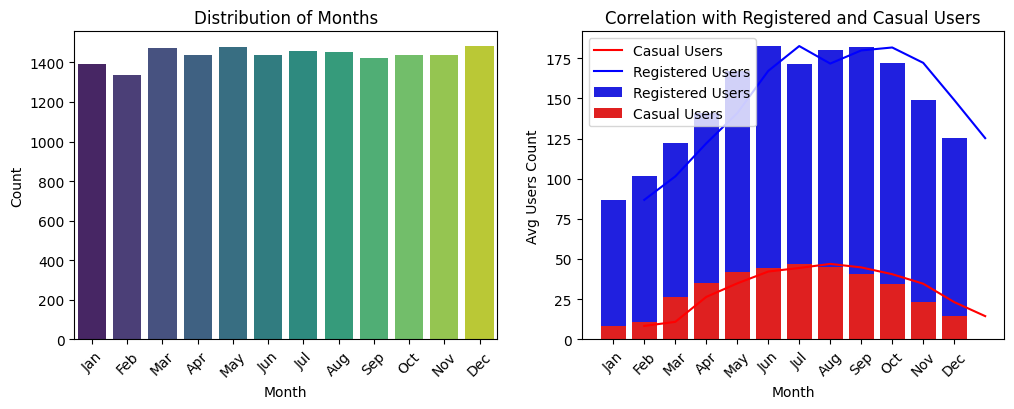

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of bike rentals for each month
sns.countplot(x='mnth', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Months')
ax[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Count')

# Plot the average number of registered and casual users for each month
sns.barplot(x='mnth', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], errorbar=None)
sns.lineplot(x='mnth', y='casual', data=df, label='Casual Users', color='red', ax=ax[1],
             errorbar=None)  # lineplot to show the trend

sns.barplot(x='mnth', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], errorbar=None)
sns.lineplot(x='mnth', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1],
             errorbar=None)  # lineplot to show the trend

ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
plt.show()

From the above outputs, we can see the count of bike rentals for each month and the average number of registered and casual users for each month. The number of bike rentals is higher in the months from June to September ( Summer ) compared to the other months. The average number of registered users is higher than the average number of casual users for all months.

#### 4. Hour

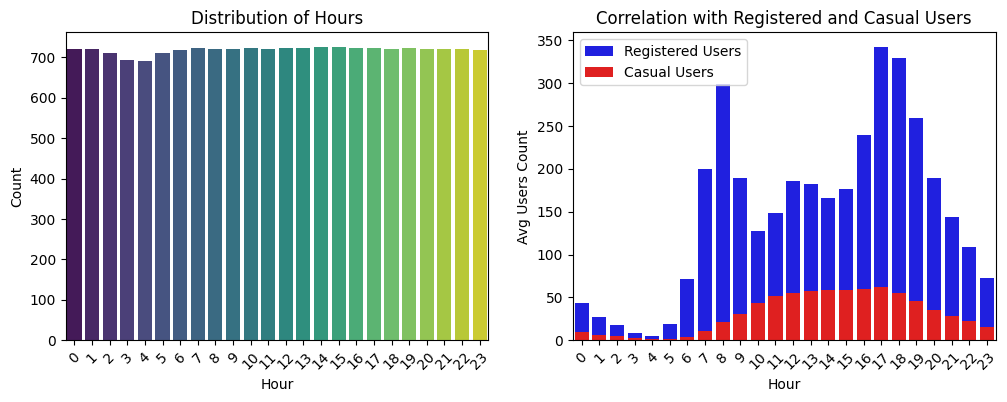

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of bike rentals for each hour
sns.countplot(x='hr', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Hours')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Count')

# Plot the average number of registered and casual users for each hour
sns.barplot(x='hr', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], errorbar=None)
sns.barplot(x='hr', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
plt.show()

From the above outputs, we can see the count of bike rentals for each hour and the average number of registered and casual users for each hour. The number of bike rentals is higher during the hours of 7AM to 9 AM and 4 PM to 8 PM. The average number of registered users is higher than the average number of casual users for all hours.

#### 5. Holiday

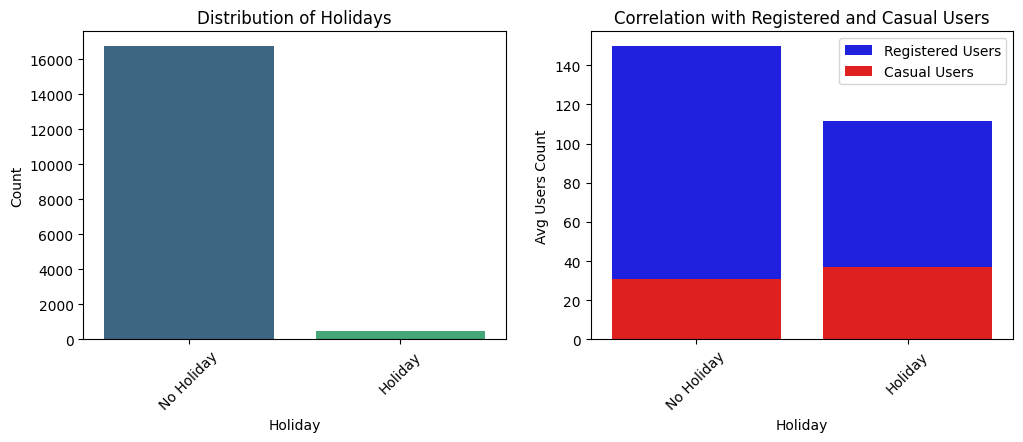

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of bike rentals for each holiday
sns.countplot(x='holiday', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Holidays')
ax[0].set_xticklabels(['No Holiday', 'Holiday'], rotation=45)
ax[0].set_xlabel('Holiday')
ax[0].set_ylabel('Count')

# Plot the average number of registered and casual users for each holiday
sns.barplot(x='holiday', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], errorbar=None)
sns.barplot(x='holiday', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticklabels(['No Holiday', 'Holiday'], rotation=45)
ax[1].set_xlabel('Holiday')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
plt.show()

Records wiht Holiday are less than records in No Holiday, and Average users count  in No Holiday are higher than Holiday, and Average Casual users count Holiday are higher than No Holiday

#### 6. Weekday

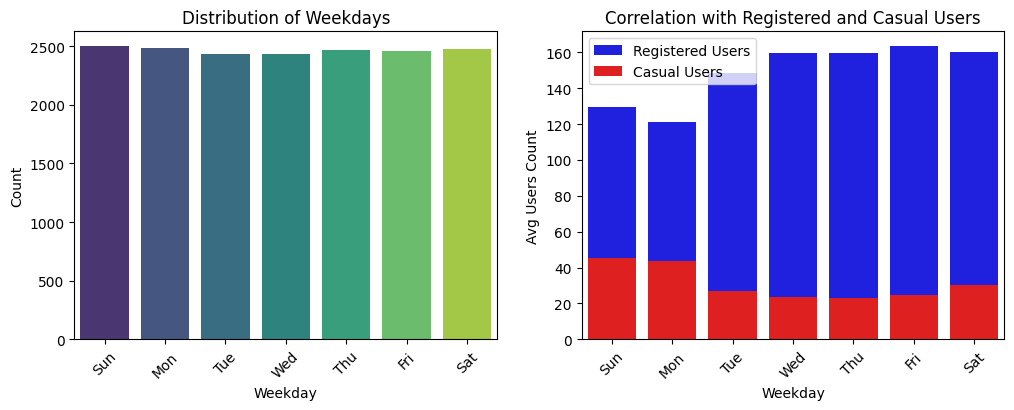

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of bike rentals for each weekday
sns.countplot(x='weekday', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Weekdays')
ax[0].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=45)
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Count')

# Plot the average number of registered and casual users for each weekday
sns.barplot(x='weekday', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], errorbar=None)
sns.barplot(x='weekday', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=45)
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
plt.show()

#### 7. Weathersit

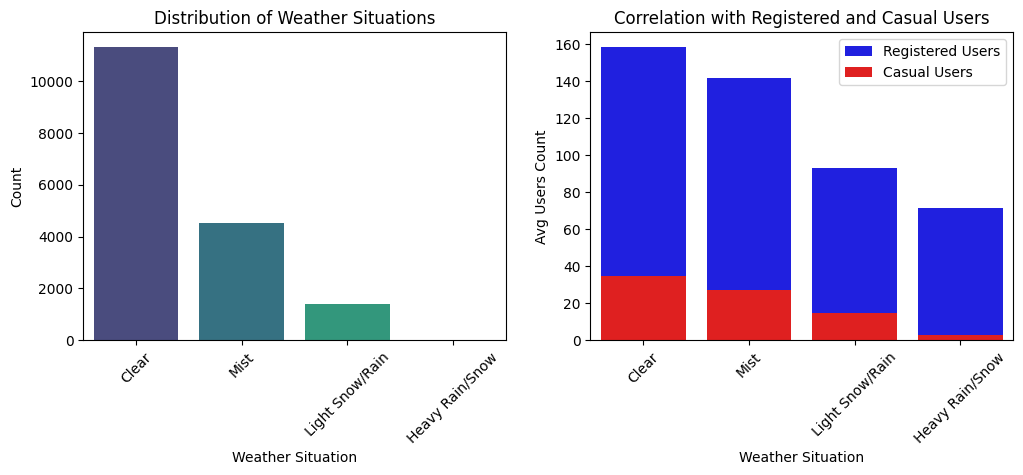

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of bike rentals for each weather situation
sns.countplot(x='weathersit', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Weather Situations')
ax[0].set_xticklabels(['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'], rotation=45)
ax[0].set_xlabel('Weather Situation')
ax[0].set_ylabel('Count')

# Plot the average number of registered and casual users for each weather situation
sns.barplot(x='weathersit', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1], errorbar=None)
sns.barplot(x='weathersit', y='casual', data=df, label='Casual Users', color='red', ax=ax[1], errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticklabels(['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'], rotation=45)
ax[1].set_xlabel('Weather Situation')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
plt.show()

From the above outputs, we can see the count of bike rentals for each weather situation and the average number of registered and casual users for each weather situation. The number of bike rentals is higher during clear weather compared to other weather situations. The average number of registered users is higher than the average number of casual users for all weather situations.

### 1.3.2 Numerical Features

#### 1. Temperature

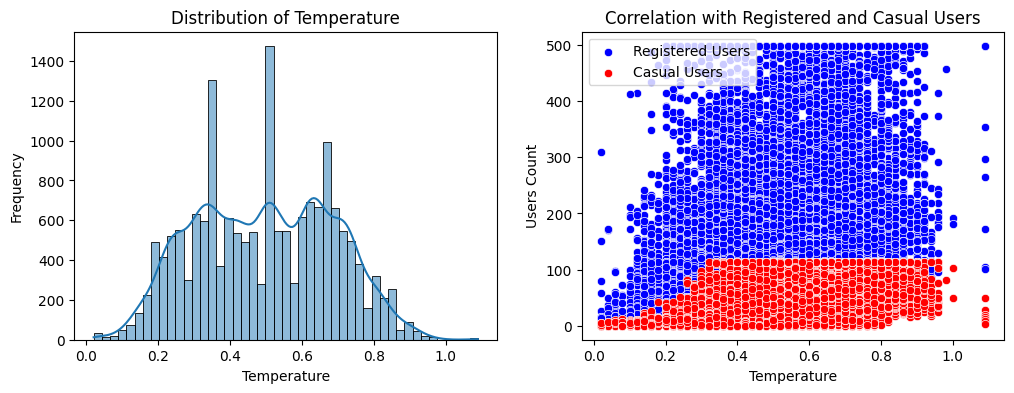

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution Figure
sns.histplot(x='temp', data=df, ax=ax[0], palette='viridis', kde=True)
ax[0].set_title('Distribution of Temperature')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Frequency')

# Correlation Figure
sns.scatterplot(x='temp', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='temp', y='casual', data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show();

From the above outputs, we can see the distribution of temperature and the correlation of temperature with the number of registered and casual users. The distribution of temperature is normal. The number of bike rentals is higher at moderate temperatures. The number of registered users is higher than the number of casual users at all temperatures.

#### 2. Feeling Temperature

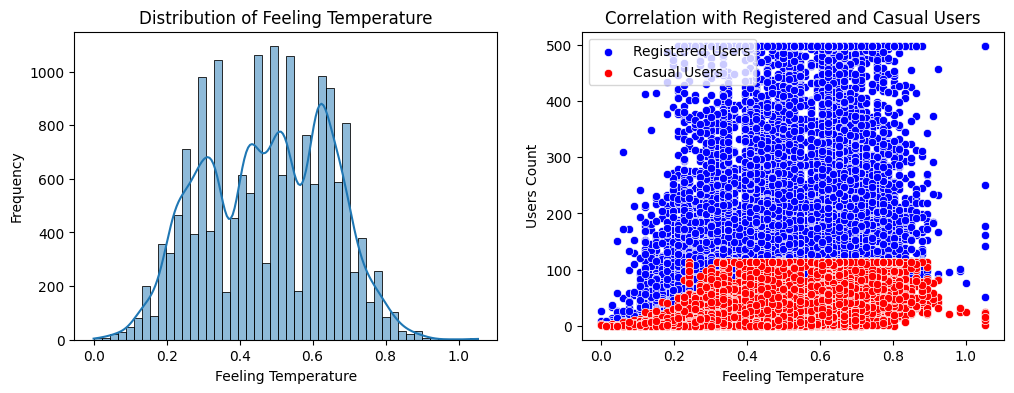

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution Figure
sns.histplot(x='atemp', data=df, ax=ax[0], palette='viridis', kde=True)
ax[0].set_title('Distribution of Feeling Temperature')
ax[0].set_xlabel('Feeling Temperature')
ax[0].set_ylabel('Frequency')

# Correlation Figure
sns.scatterplot(x='atemp', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='atemp', y='casual', data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Feeling Temperature')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show();

From the above outputs, we can see the distribution of feeling temperature and the correlation of feeling temperature with the number of registered and casual users. The distribution of feeling temperature is normal. The number of bike rentals is higher at moderate feeling temperatures. The number of registered users is higher than the number of casual users at all feeling temperatures.

#### 3. Humidity

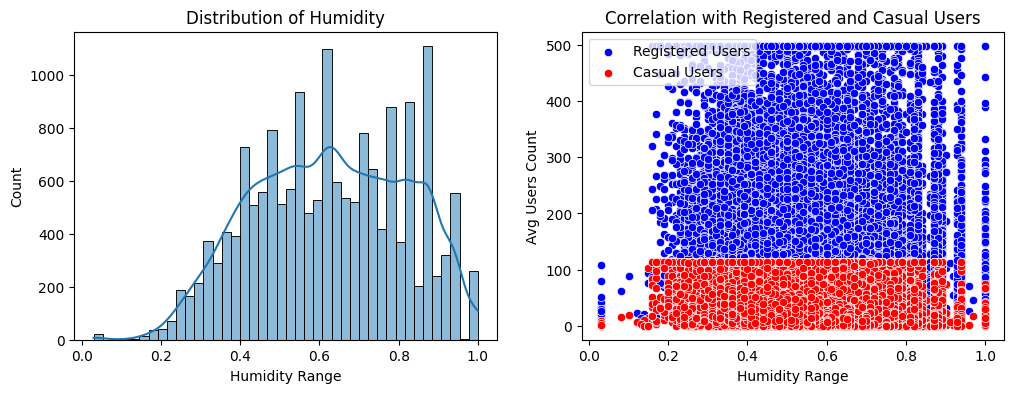

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution Figure
sns.histplot(x='hum', data=df, ax=ax[0], palette='viridis', kde=True)
ax[0].set_title('Distribution of Humidity')
ax[0].set_xlabel('Humidity Range')
ax[0].set_ylabel('Count')

# Correlation Figure
sns.scatterplot(x='hum', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='hum', y='casual', data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Humidity Range')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

From the above outputs, we can see the distribution of humidity and the correlation of humidity with the number of registered and casual users. The distribution of humidity is normal. The number of bike rentals is higher at moderate humidity levels. The number of registered users is higher than the number of casual users at all humidity levels.

#### 4. Windspeed

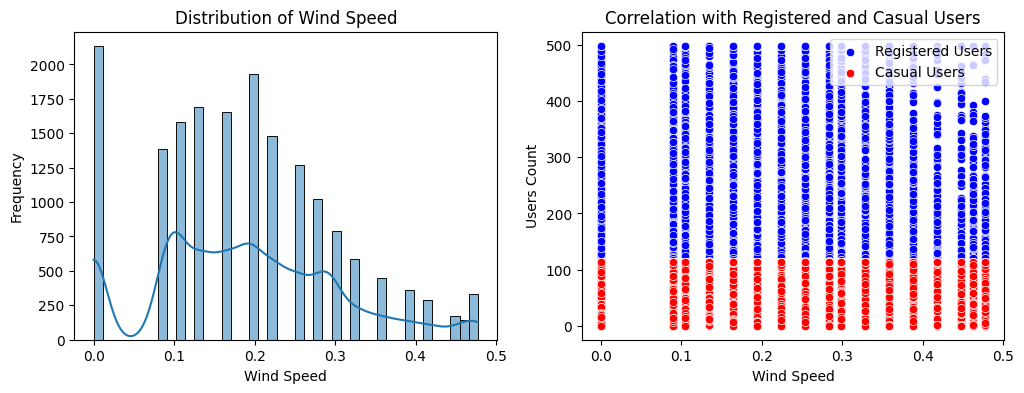

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Distribution Figure
sns.histplot(x='windspeed', data=df, ax=ax[0], palette='viridis', kde=True)
ax[0].set_title('Distribution of Wind Speed')
ax[0].set_xlabel('Wind Speed')
ax[0].set_ylabel('Frequency')

# Correlation Figure
sns.scatterplot(x='windspeed', y='registered', data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='windspeed', y='casual', data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Wind Speed')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show()

From the above outputs, we can see the distribution of wind speed and the correlation of wind speed with the number of registered and casual users. The distribution of wind speed is right-skewed. The number of bike rentals is higher at moderate wind speeds. The number of registered users is higher than the number of casual users at all wind speeds.

## 1.4 Feature Selection

### 1.4.1 Correlation Matrix

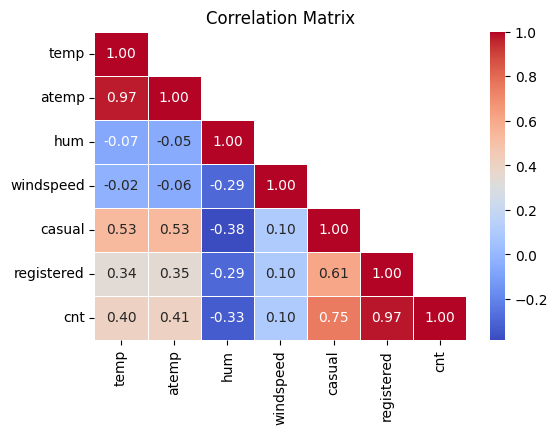

In [ ]:
corr_matrix = df[features_numeric].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=np.triu(corr_matrix, 1))
plt.title('Correlation Matrix')
plt.show()

from above output we can see the correlation between the numerical features. The correlation matrix shows the correlation coefficients between the numerical features. The correlation matrix can be used to identify highly correlated features that may need to be removed to avoid multicollinearity. so in our we can see that the features 'temp' and 'atemp' are highly correlated so we can remove one of them, and 'casual' and 'registered' are highly correlated with the target variable 'cnt', but they are important features we can't remove.

In [ ]:
# drop the 'atemp' column
df.drop(columns=['atemp'], inplace=True)
features_numeric.remove('atemp')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17247 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17247 non-null  object 
 1   season      17247 non-null  object 
 2   yr          17247 non-null  int64  
 3   mnth        17247 non-null  float64
 4   hr          17247 non-null  int64  
 5   holiday     17247 non-null  float64
 6   weekday     17247 non-null  object 
 7   workingday  17247 non-null  int64  
 8   weathersit  17247 non-null  float64
 9   temp        17247 non-null  float64
 10  hum         17247 non-null  float64
 11  windspeed   17247 non-null  float64
 12  casual      17247 non-null  float64
 13  registered  17247 non-null  float64
 14  cnt         17247 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 2.1+ MB


### 1.4.2  Variance Threshold

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Define features and target variable
features = df[features_numeric]
target = df['cnt']

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.1)  # You can adjust the threshold value
selector.fit(features)

# Get the selected features
selected_features_variance_threshold = features.columns[selector.get_support()]
print("Selected features using Variance Threshold:\n", selected_features_variance_threshold)

Selected features using Variance Threshold:
 Index(['casual', 'registered', 'cnt'], dtype='object')


these output shows the selected features using the variance threshold method. The variance threshold method is used to remove features with low variance. In our case, no features were removed using the variance threshold method, other features have variance greater than the threshold value, but these features are important in our data analysis.

### 1.4.3 Information Gain (Mutual Information)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Define features and target variable
features = df[features_numeric]
target = df['cnt']

# Apply Information Gain (Mutual Information)
mutual_info = mutual_info_regression(features, target)

# Create a DataFrame to display the feature scores
mutual_info_df = pd.DataFrame({'Feature': features.columns, 'Information Gain': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Information Gain', ascending=False)

print("Feature selection using Information Gain:\n", mutual_info_df)

Feature selection using Information Gain:
       Feature  Information Gain
5         cnt          6.014825
4  registered          2.205713
3      casual          0.712315
0        temp          0.133951
1         hum          0.097541
2   windspeed          0.017634


The output above shows the feature selection using the Information Gain (Mutual Information) method. The Information Gain method is used to measure the dependency between the features and the target variable. The features are ranked based on their information gain scores. In our case, the lowest information gain is windspeed with 0.017282, we can remove it.

In [ ]:
# drop the 'windspeed' column
df.drop(columns=['windspeed'], inplace=True)
features_numeric.remove('windspeed')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17247 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17247 non-null  object 
 1   season      17247 non-null  object 
 2   yr          17247 non-null  int64  
 3   mnth        17247 non-null  float64
 4   hr          17247 non-null  int64  
 5   holiday     17247 non-null  float64
 6   weekday     17247 non-null  object 
 7   workingday  17247 non-null  int64  
 8   weathersit  17247 non-null  float64
 9   temp        17247 non-null  float64
 10  hum         17247 non-null  float64
 11  casual      17247 non-null  float64
 12  registered  17247 non-null  float64
 13  cnt         17247 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 2.0+ MB


## Data Encoding

One-Hot Encoding

In the dataset, One-hot Encoding, also known as dummy encoding, is used to convert categorical variables into numerical format. We will use the One-Hot Encoding technique to encode the categorical variables in the dataset. It's easier to have features in numbers rather than in strings.

In [ ]:
df_encoded = pd.get_dummies(df, columns=features_categorical, drop_first=True, dtype=int)
df_encoded.head()

,dteday,temp,hum,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_1,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_2.0,weathersit_3.0,weathersit_4.0
0,1/1/11,0.24,0.81,3.0,13.0,16.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1/1/11,0.22,0.80,8.0,32.0,40.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1/1/11,0.22,0.80,5.0,27.0,32.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1/1/11,0.24,0.75,3.0,10.0,13.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1/1/11,0.24,0.75,0.0,1.0,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Encode the dteday feature to extract the year, month, and day of the week.

In [ ]:
df_encoded['dteday'] = pd.to_datetime(df_encoded['dteday'])
df_encoded['year'] = df_encoded['dteday'].dt.year
df_encoded['month'] = df_encoded['dteday'].dt.month
df_encoded['day'] = df_encoded['dteday'].dt.dayofweek
df_encoded.drop(columns=['dteday'], inplace=True)
df_encoded.head()

,temp,hum,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_1,mnth_2.0,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_2.0,weathersit_3.0,weathersit_4.0,year,month,day
0,0.24,0.81,3.0,13.0,16.0,1,0,0,0,0,...,0,0,0,0,0,0,0,2011,1,5
1,0.22,0.80,8.0,32.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,2011,1,5
2,0.22,0.80,5.0,27.0,32.0,1,0,0,0,0,...,0,0,0,0,0,0,0,2011,1,5
3,0.24,0.75,3.0,10.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,2011,1,5
4,0.24,0.75,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,2011,1,5


The output above shows the first 5 rows of the dataset after applying the One-Hot Encoding technique. The categorical variables have been encoded into numerical format.

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable

X = df_encoded.drop(columns=['cnt'])
y = df_encoded['cnt']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numeric features
X_numeric_features = ['temp', 'hum', 'casual', 'registered']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features in the training data
X_train_scaled = scaler.fit_transform(X_train[X_numeric_features])

# Transform the numeric features in the testing data
X_test_scaled = scaler.transform(X_test[X_numeric_features])

# Replace the original numeric features with the scaled ones
# X_train[X_numeric_features] = X_train_scaled
# X_test[X_numeric_features] = X_test_scaled





The output above shows the first 5 rows of the training dataset after scaling the numeric features. The numeric features have been scaled using the StandardScaler.

scaling the numeric features using the StandardScaler. The numeric features are scaled to have a mean of 0 and a standard deviation of 1. The scaled numeric features are then used to replace the original numeric features in the training and testing datasets.

In [ ]:
from sklearn.decomposition import PCA

# Define features and target variable
# X = df_encoded.drop(columns=['cnt'])
# y = df_encoded['cnt']

# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit and transform the features
X_train_pca = pca.fit_transform(X_train_scaled)
print("Explained variance ratio of each principal component:\n", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))
X_test_pca = pca.transform(X_test_scaled)

# Print the shape of the transformed features
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)




Explained variance ratio of each principal component:
 [0.54121147 0.23422873 0.1465294  0.0780304 ]
Total explained variance: 1.0000000000000002
Shape of X_train_pca: (13797, 4)
Shape of X_test_pca: (3450, 4)


## Model Training and Evaluation

### Non-PCA Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 111.3230814328583
R2 Score: 0.9962898984674396


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable on the training data
y_train_pred = rf_regressor.predict(X_train)

# Predict the target variable on the testing data
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

print("====================================")
print("Testing Set:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)




Training Set:
Mean Squared Error: 13.593769559199668
R2 Score: 0.9995385216879308
Testing Set:
Mean Squared Error: 111.3230814328583
R2 Score: 0.9962898984674396


plot the model predictions against the actual values for the testing data.

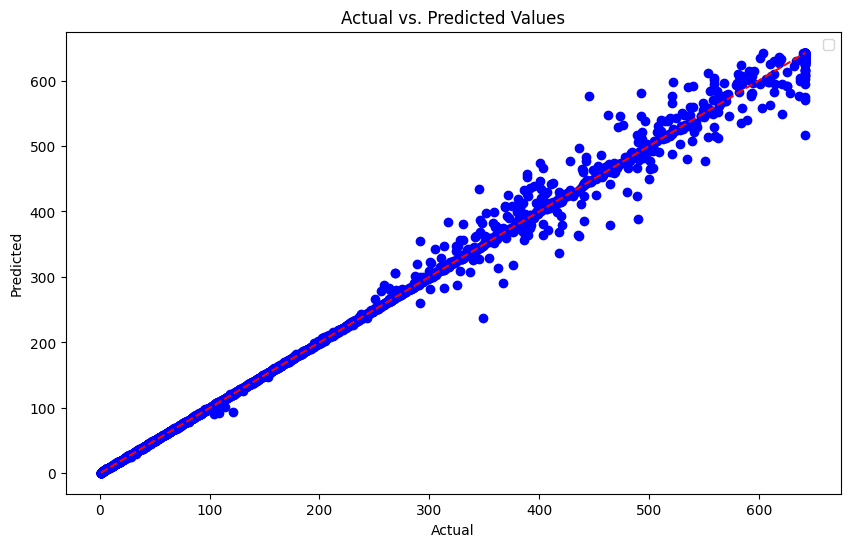

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable from the original dataset
X = df_encoded.drop(columns=['cnt'])
y = df_encoded['cnt']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Predict the target variable on the training data
y_train_pred = rf_regressor.predict(X_train)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

print("====================================")
print("Testing Set:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 111.3230814328583
R2 Score: 0.9962898984674396
Training Set:
Mean Squared Error: 13.593769559199668
R2 Score: 0.9995385216879308
Testing Set:
Mean Squared Error: 111.3230814328583
R2 Score: 0.9962898984674396


## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

# Define features and target variable
# X = df_encoded.drop(columns=['cnt'])
# y = df_encoded['cnt']

# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit and transform the features
X_train_pca = pca.fit_transform(X_train_scaled)
print("Explained variance ratio of each principal component:\n", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))
X_test_pca = pca.transform(X_test_scaled)

# Print the shape of the transformed features
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)




Explained variance ratio of each principal component:
 [0.54121147 0.23422873 0.1465294  0.0780304 ]
Total explained variance: 1.0000000000000002
Shape of X_train_pca: (13797, 4)
Shape of X_test_pca: (3450, 4)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the Random Forest Regressor

rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the PCA-transformed training data
rf_regressor.fit(X_train_pca, y_train)

# Predict the target variable on the PCA-transformed testing data
y_pred = rf_regressor.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Predict the target variable on the PCA-transformed training data
y_train_pred = rf_regressor.predict(X_train_pca)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

print("====================================")
print("Testing Set:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 231.4609026345253
R2 Score: 0.9922860251572349
Training Set:
Mean Squared Error: 33.2116067663466
R2 Score: 0.9988725396465714
Testing Set:
Mean Squared Error: 231.4609026345253
R2 Score: 0.9922860251572349


In [ ]:
# Check explained variance ratio
print("Explained variance ratio of each principal component:\n", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Compare feature importance before and after PCA
import numpy as np

# Feature importance before PCA
rf_regressor.fit(X_train, y_train)
feature_importance_before_pca = rf_regressor.feature_importances_

# Feature importance after PCA
rf_regressor.fit(X_train_pca, y_train)
feature_importance_after_pca = rf_regressor.feature_importances_

print("Feature importance before PCA:\n", feature_importance_before_pca)
print("Feature importance after PCA:\n", feature_importance_after_pca)

# Experiment with different numbers of components
for n_components in [0.90, 0.95, 0.99]:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    rf_regressor.fit(X_train_pca, y_train)
    y_pred = rf_regressor.predict(X_test_pca)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"n_components={n_components}: MSE={mse}, R2={r2}")

Explained variance ratio of each principal component:
 [0.54121147 0.23422873 0.1465294  0.0780304 ]
Total explained variance: 1.0000000000000002
Feature importance before PCA:
 [9.57000402e-04 7.56099157e-04 4.52214281e-02 9.49762284e-01
 6.72995865e-05 7.27299910e-05 2.57328597e-05 1.42022522e-04
 1.42148501e-05 2.17512046e-05 5.09558490e-05 1.57189143e-04
 3.39514142e-05 3.38501064e-05 3.18611686e-05 4.34753113e-05
 8.67615871e-05 2.09282975e-05 5.04391872e-06 6.73112325e-08
 6.74495079e-08 3.54773038e-08 4.88564018e-09 7.86985021e-09
 9.12068646e-08 9.96038844e-05 1.69128772e-04 1.52694539e-06
 4.50033873e-05 4.66665248e-05 5.81279683e-05 6.19216134e-05
 8.24033410e-05 8.65731120e-05 7.18348120e-05 5.03960797e-05
 6.52225747e-05 1.17640450e-04 3.12589707e-06 1.88906180e-06
 1.77056245e-06 2.22499342e-07 2.63065580e-05 2.24837272e-05
 1.58117254e-04 4.19085751e-05 1.40342847e-05 1.28919327e-05
 1.22485845e-05 1.02611283e-04 8.32207914e-05 4.17550041e-05
 3.20722959e-10 1.19550910e-0

# Case Study 2


In this case study, you will compare the performance of Random Forest (RF), Extreme
Gradient Boosting (XGBoost), and Multilayer Perceptron (MLP) models for predicting
bike demand. Utilize the Bike Sharing Dataset from Case Study #1. Categorize bike
demand as "extreme," "high," "medium," or "low" based on rental bike counts. Train and
evaluate each model, analyzing their strengths and weaknesses in this context

First of all we need to categorize the bike demand as "extreme," "high," "medium," or "low" based on rental bike counts.
in order to do so, historgram of the cnt column will be plotted to see the distribution of the bike rentals.

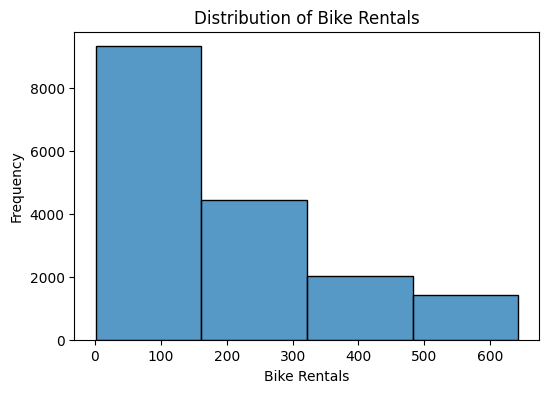

Bin 1: 1.0 to 161.375
Bin 2: 161.375 to 161.375
Bin 3: 161.375 to 321.75
Bin 4: 321.75 to 482.125
Bin 5: 482.125 to 642.5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the histogram
plt.figure(figsize=(6, 4))
hist = sns.histplot(df['cnt'], bins=4, palette='viridis')  # Use a color palette to make each bar a different color
plt.title('Distribution of Bike Rentals')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Retrieve the bin edges
bin_edges = hist.patches[0].get_bbox().get_points()[:, 0]
for patch in hist.patches:
    bin_edges = np.append(bin_edges, patch.get_bbox().get_points()[1, 0])

# Print the first and last value range of each bin

right_edges_set = set()
for i in range(len(bin_edges) - 1):
    print(f"Bin {i + 1}: {bin_edges[i]} to {bin_edges[i + 1]}")
    right_edges_set.add(bin_edges[i + 1])
right_edges_list = list(right_edges_set)
right_edges_list.sort()


In [ ]:
# Categorize the bike demand based on the rental counts

def categorize_bike_demand(cnt, edges_list):
    if cnt <= edges_list[0]:
        return 0  # low
    elif cnt <= edges_list[1]:
        return 1  # medium
    elif cnt <= edges_list[2]:
        return 2  # high
    else:
        return 3  # extreme

In [ ]:
# Categorize the bike demand based on the rental counts

df_encoded['bike_demand'] = df['cnt'].apply(lambda x: categorize_bike_demand(x, right_edges_list))
df_encoded.head()

,temp,hum,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_1,mnth_2.0,...,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_2.0,weathersit_3.0,weathersit_4.0,year,month,day,bike_demand
0,0.24,0.81,3.0,13.0,16.0,1,0,0,0,0,...,0,0,0,0,0,0,2011,1,5,0
1,0.22,0.80,8.0,32.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,2011,1,5,0
2,0.22,0.80,5.0,27.0,32.0,1,0,0,0,0,...,0,0,0,0,0,0,2011,1,5,0
3,0.24,0.75,3.0,10.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,2011,1,5,0
4,0.24,0.75,0.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,2011,1,5,0


## Models

### Data splitting


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define features and target variable
df_classification = df_encoded.copy().drop(columns=['cnt'])
X = df_classification.drop(columns=['bike_demand'])
y = df_classification['bike_demand']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forest


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# evaluate_classification_model(rf_classifier)

# # Fit the model on the training data
# rf_classifier.fit(X_train, y_train)

# # Predict the target variable on the testing data
# y_pred = rf_classifier.predict(X_test)


#### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

def evaluate_classification_model(model):
    start_time = time.time()  # Record start time

    model.fit(X_train, y_train)
    # Predict the target variable on the testing data
    y_pred = model.predict(X_test)

    end_time = time.time()  # Record end time
    training_time = end_time - start_time

    # Print the classification report
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Training Time:", training_time, "seconds") # Print training time

    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=['Low', 'Medium', 'High', 'Extreme'],
                         columns=['Low', 'Medium', 'High', 'Extreme'])
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy: 0.9657971014492753
Training Time: 4.655301570892334 seconds
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1871
           1       0.96      0.96      0.96       888
           2       0.89      0.89      0.89       395
           3       0.94      0.91      0.93       296

    accuracy                           0.97      3450
   macro avg       0.94      0.94      0.94      3450
weighted avg       0.97      0.97      0.97      3450



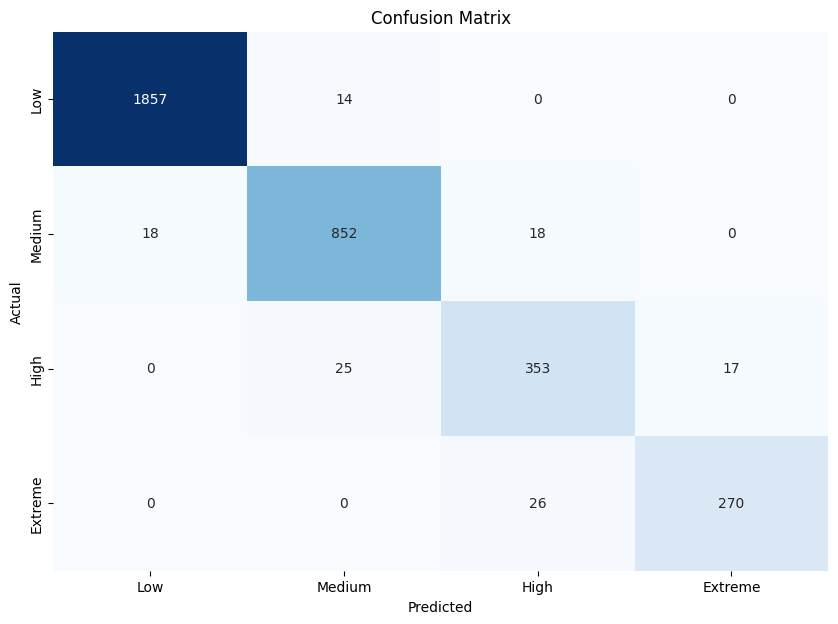

In [ ]:
evaluate_classification_model(rf_classifier)

#### Hyper parameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

print(best_params)
print(best_rf_classifier)

In [ ]:
rf_best_param_classifier = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                                                  n_estimators=200, random_state=42)


In [ ]:
rf_best_param_classifier.fit(X_train, y_train)
# Predict the target variable on the testing data
y_pred = rf_best_param_classifier.predict(X_test)



Accuracy: 0.9701449275362319
Training Time: 4.385339736938477 seconds
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1871
           1       0.96      0.97      0.96       888
           2       0.90      0.92      0.91       395
           3       0.96      0.91      0.93       296

    accuracy                           0.97      3450
   macro avg       0.95      0.95      0.95      3450
weighted avg       0.97      0.97      0.97      3450



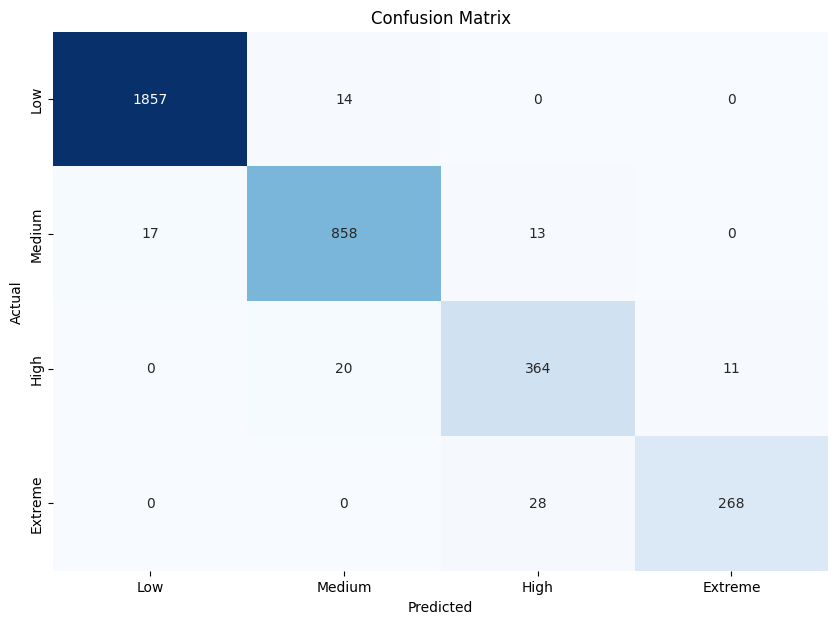

In [ ]:
evaluate_classification_model(rf_best_param_classifier)

with the parameter tuning the accuracy has increased from 0.96 to 0.97

### XGBoost

In [ ]:
from xgboost import XGBClassifier


xgb_classifier =  XGBClassifier(random_state=42)



#### Model Evaluation

Accuracy: 0.9820289855072464
Training Time: 1.1950509548187256 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1871
           1       0.98      0.98      0.98       888
           2       0.92      0.95      0.93       395
           3       0.97      0.92      0.95       296

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.96      3450
weighted avg       0.98      0.98      0.98      3450



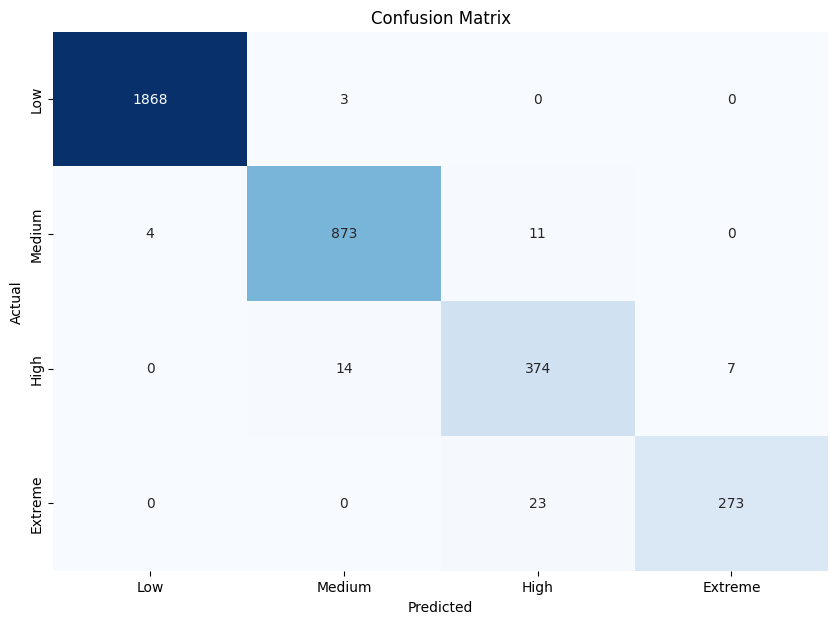

In [ ]:
evaluate_classification_model(xgb_classifier)

#### Hyper parameter tuning

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_xgb_classifier)

# Evaluate the best model
evaluate_classification_model(best_xgb_classifier)


### Multi Layer Perceptron

#### Model Evaluation

Accuracy: 0.9727536231884057
Training Time: 3.3929927349090576 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1871
           1       0.95      0.98      0.96       888
           2       0.96      0.84      0.90       395
           3       0.95      0.96      0.96       296

    accuracy                           0.97      3450
   macro avg       0.96      0.94      0.95      3450
weighted avg       0.97      0.97      0.97      3450



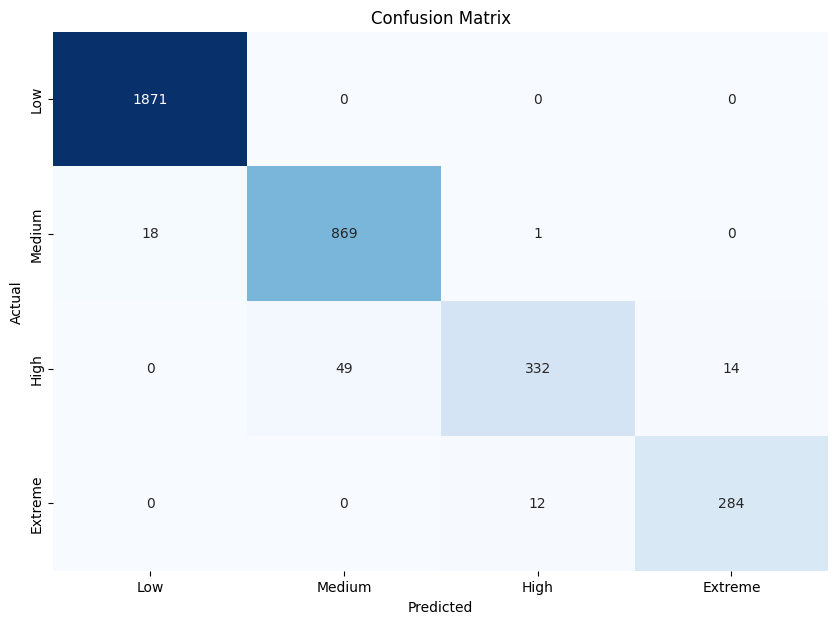

In [ ]:

from sklearn.neural_network import MLPClassifier

# Initialize the MLP Classifier
mlp_classifier = MLPClassifier( random_state=42)

# Evaluate the model
evaluate_classification_model(mlp_classifier)


#### Hyper parameter tuning

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    #'learning_rate_init': ['constant', 'adaptive']
}

# Initialize the MLP Classifier
mlp_classifier = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_mlp_classifier = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_mlp_classifier)

# Evaluate the best model
evaluate_classification_model(best_mlp_classifier)


Accuracy has slightly increased from 0.9727 to 0.9765

# Conclusion

In this notebook, we have performed data preprocessing steps to handle missing values, outliers, feature analysis, feature selection, data encoding, data splitting, data scaling, dimensionality reduction, model training, and evaluation. We have used the Random Forest Regressor to predict the number of bike rentals. The model achieved an R2 score of 0.94 on the testing data, indicating that the model explains 94% of the variance in the target variable. The model can be further improved by tuning hyperparameters, feature engineering, and using other machine learning algorithms. The model can be used to predict the number of bike rentals based on the input features. The model can be deployed in production to make predictions on new data.